# **DataJam 2020**

Integrantes:

Tatiana Rueda / Benito Rodriguez / Stephania Sastre / Javier Carrillo / Aleidali Macias 


El análisis por PCA que se realiza a continuación tiene como propósito caracterizar el dataset original de tal manera que se logre disminuir su dimensión sin perder información, es decir, conservando aquella representación que mayor varianza logre acumular. 

Además, cada una de las nuevas variables PCA guarda información relevante de alguna característica en particular de los registros contenidos en el dataset, razón por la cual se esperaría que al ver la representación gráfica de las dos primeras variables, éstas mostraran una separación entre los datos de tal manera que sea más sencillo ver grupos de personas que comparten dichas características y ello nos puede dar una idea de cuáles son los 
factores que más influyen en las personas que han sufrido de algún tipo de violencia sexual, las cuales en nuestro análisis pueden ir desde hostigamiento sexual, manoseo, exhibicionismo o intento de violación hasta incluso llegar a una violación.



## CONCLUSIONES

Se realizaron tres caracterizaciones de análisis PCA de acuerdo a las siguientes variables:

- Por rangos de edad de las personas victimas
- Por entidad en que reside la victima
- Sexo de la vectima.


Al observar las tres gráficas resultantes del análisis (Ver apartado Análisis por PCA), dentro de las principales conclusiones se encontró que no fue posible una representación adecuada (al menos de acuerdo a las tres variables mencionadas anteriormente) pues pese a que se encuentra una separación en los datos, resulta poco certero saber qué es lo caracteriza a cada pequeño grupo que se formó. Sin embargo, para un dataset de mayor dimensión posiblemente permita tener una mejor representación y separación en los datos.

Es importante saber que para tratar de disminuir el caso de la trata de personas se debe de conocer cuáles son las mínimas características que más puedan estar afectando, como lo es el caso de la violencia sexual y este método (con una base adeacuada) da mucha certeza y visión de ello.



# **Conexión a Drive**

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Librerías**

In [4]:
pip install dfply


     |████████████████████████████████| 614kB 2.8MB/s 


In [94]:
import numpy as np
import pandas as pd
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import csv

from dfply import *

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# **Pegado de Bases ENVIPE (Inegi)**



In [6]:
Vic1=pd.read_csv('/content/gdrive/My Drive/DataJam2020/conjunto_de_datos_TPer_Vic1_ENVIPE_2019.csv', lineterminator=None)
Vic2=pd.read_csv('/content/gdrive/My Drive/DataJam2020/conjunto_de_datos_TPer_Vic2_ENVIPE_2019.csv', lineterminator=None)
THogar=pd.read_csv('/content/gdrive/My Drive/DataJam2020/conjunto_de_datos_THogar_ENVIPE_2019.csv', lineterminator=None)
TMod=pd.read_csv('/content/gdrive/My Drive/DataJam2020/conjunto_de_datos_TMod_Vic_ENVIPE_2019.csv', lineterminator=None)
TSDem=pd.read_csv('/content/gdrive/My Drive/DataJam2020/conjunto_de_datos_TSDem_ENVIPE_2019.csv', lineterminator=None)
TVivienda=pd.read_csv('/content/gdrive/My Drive/DataJam2020/conjunto_de_datos_TVivienda_ENVIPE_2019.csv', lineterminator=None)


Vic1=Vic1.replace({r'\r': ''}, regex=True)
Vic2=Vic2.replace({r'\r': ''}, regex=True)
THogar=THogar.replace({r'\r': ''}, regex=True)
TMod=TMod.replace({r'\r': ''}, regex=True)
TSDem=TSDem.replace({r'\r': ''}, regex=True)
TVivienda=TVivienda.replace({r'\r': ''}, regex=True)

In [7]:
print(Vic1.shape)
print(Vic2.shape)
print(THogar.shape)
print(TMod.shape)
print(TSDem.shape)
print(TVivienda.shape)

(91896, 186)
(91896, 149)
(92049, 18)
(46356, 129)
(325381, 26)
(89920, 20)


## **Pegado VIC1 y VIC2**

Observaciones:

Una vivienda puede tener varios hogares / 
En cada hogar se entrevista a una persona / 
Cada renglón corresponde a una persona

In [12]:
Vic1_cols=['ID_VIV', 'ID_HOG', 'ID_PER', 'UPM', 'VIV_SEL', 'HOGAR', 'RESUL_H',
       'R_SEL', 'SEXO', 'EDAD', 'AREAM', 'CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN',  #datos generales
       'AP4_3_1' , 'AP4_3_2' , 'AP4_3_3' , 'AP4_4_01' , 'AP4_4_02' , 'AP4_4_03' ,     #Preguntas de interés
        'AP4_4_09' , 'AP4_5_08' , 'AP4_5_12' , 'AP4_5_13' , 'AP4_5_14' , 'AP4_5_15' ,
        'AP4_6_3' , 'AP4_8_1' , 'AP4_8_2' , 'AP4_8_4' , 'AP4_8_5' ,  'AP4_10_01' ,  
        'AP4_10_02' ,'AP4_10_05' ,'AP4_10_09' ,'ESTRATO','DOMINIO']
Vic2_cols=['ID_VIV', 'ID_HOG', 'ID_PER',                                              #datos generales
          'AP6_10_1' ,'AP6_12_1' ,'AP6_15_1' , 'AP6_22_1' ,'AP7_3_14']                #Preguntas de interés

VicTot=pd.merge(Vic1[Vic1_cols],Vic2[Vic2_cols],how='left',left_on=['ID_VIV',	'ID_HOG',	'ID_PER'],right_on=['ID_VIV',	'ID_HOG',	'ID_PER'])
print(VicTot.shape)
VicTot.head(1)

(91896, 43)


,ID_VIV,ID_HOG,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,SEXO,EDAD,AREAM,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,AP4_3_1,AP4_3_2,AP4_3_3,AP4_4_01,AP4_4_02,AP4_4_03,AP4_4_09,AP4_5_08,AP4_5_12,AP4_5_13,AP4_5_14,AP4_5_15,AP4_6_3,AP4_8_1,AP4_8_2,AP4_8_4,AP4_8_5,AP4_10_01,AP4_10_02,AP4_10_05,AP4_10_09,ESTRATO,DOMINIO,AP6_10_1,AP6_12_1,AP6_15_1,AP6_22_1,AP7_3_14
0,100013.01,0100013.01.01,0100013.01.01.01,100013,1,1,B,1,2,53,14,1,Aguascalientes,1,Aguascalientes,1,1,1,1,3,1,3,0,0,0,0,0,2,2,1,2,1,1,3,3,2,3,U,2,NA,2,NA,2


## **Pegado con THogar**

In [13]:
THogar.head(2)
# De esta base lo único importante es FAC_HOG(las demas variables ya estan en VicTot), revisar si es el factor para representabilidad nacional.

,ID_VIV,ID_HOG,UPM,VIV_SEL,HOGAR,RESUL_H,N_INF,R_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,TOT_PER,FAC_HOG,FAC_HOG_AM,DOMINIO,EST_DIS,UPM_DIS
0,100013.01,0100013.01.01,100013,1,1,B,01,01,1,Aguascalientes,1,Aguascalientes,1,184,000184,U,1,1
1,100013.02,0100013.02.01,100013,2,1,A,01,02,1,Aguascalientes,1,Aguascalientes,5,184,000184,U,1,1


## **Pegado con TMod (Módulo de Victimización)**


Observaciones:

La base contiene sólo personas que han sufrido de algún delito.

Una persona puede haber sufrido varios delitos.

In [15]:

TMod_cols_base=['ID_VIV','ID_HOG',	'ID_PER',	'ID_DEL']
TMod_cols=['ID_VIV','ID_HOG',	'ID_PER',	'ID_DEL','BPCOD',       #datos generales de la persona y el delito
           'BP1_5','BP1_1','BP1_4','BP1_8' , 'BP1_9','BP7_1','BP1_10_1' , 'BP1_10_2']           #variables de interes 

In [30]:
#Filtro por tipo de delito 13 y 14
#13: Alguien en contra de su voluntad lo(a) agredió mediante hostigamiento sexual, manoseo, exhibicionismo o intento de violación
#14: Fue obligado(a) mediante violencia física o amenaza por alguien conocido o desconocido a tener una actividad sexual no deseada (violación sexual)

TMod_Filter=TMod[(TMod['BPCOD']==13) | (TMod['BPCOD']==14)][TMod_cols] 

print('Casos que sufrieron algún abuso:')
print(TMod_Filter.shape[0])


print('Personas únicas que sufrieron algún abuso:')
personas_victimas_unicas=TMod_Filter['ID_PER'].unique()
print(personas_victimas_unicas.shape)

TMod_Filter.head(5)

Casos que sufrieron algún abuso:
1089
Personas únicas que sufrieron algún abuso:
(766,)


,ID_VIV,ID_HOG,ID_PER,ID_DEL,BPCOD,BP1_5,BP1_1,BP1_4,BP1_8,BP1_9,BP7_1,BP1_10_1,BP1_10_2
42,100397.04,0100397.04.01,0100397.04.01.01,0100397.04.01.01.13.1,13,1,9,3,2,1,2,1,0
56,100565.03,0100565.03.01,0100565.03.01.01,0100565.03.01.01.13.1,13,5,1,3,2,1,3,1,0
138,100186.05,0100186.05.01,0100186.05.01.11,0100186.05.01.11.13.1,13,1,7,1,2,1,3,1,0
222,100215.04,0100215.04.01,0100215.04.01.02,0100215.04.01.02.13.1,13,1,8,2,2,1,2,1,0
352,101009.01,0101009.01.01,0101009.01.01.01,0101009.01.01.01.13.1,13,1,5,2,2,2,2,1,0


#### **CREANDO DUMMIES **



In [31]:
base=TMod_Filter[TMod_cols_base]

dum1=pd.get_dummies(TMod_Filter['BPCOD'],dummy_na=True,prefix='BPCOD')
dum2=pd.get_dummies(TMod_Filter['BP1_1'],dummy_na=True,prefix='BP1_1')
dum3=pd.get_dummies(TMod_Filter['BP1_4'],dummy_na=True,prefix='BP1_4')
dum4=pd.get_dummies(TMod_Filter['BP1_5'],dummy_na=True,prefix='BP1_5')
dum5=pd.get_dummies(TMod_Filter['BP1_8'],dummy_na=True,prefix='BP1_8')
dum6=pd.get_dummies(TMod_Filter['BP1_9'],dummy_na=True,prefix='BP1_9')
dum7=pd.get_dummies(TMod_Filter['BP7_1'],dummy_na=True,prefix='BP7_1')

test=pd.concat([base,dum1,dum2,dum3,dum4,dum5,dum6,dum7],1)

TMod_VF=test.groupby(['ID_VIV','ID_HOG','ID_PER']).agg('sum')
TMod_VF_2=TMod_VF.reset_index()
TMod_VF_2.head(5)


,ID_VIV,ID_HOG,ID_PER,BPCOD_13.0,BPCOD_14.0,BPCOD_nan,BP1_1_1.0,BP1_1_2.0,BP1_1_3.0,BP1_1_4.0,BP1_1_5.0,BP1_1_6.0,BP1_1_7.0,BP1_1_8.0,BP1_1_9.0,BP1_1_10.0,BP1_1_11.0,BP1_1_12.0,BP1_1_99.0,BP1_1_nan,BP1_4_1.0,BP1_4_2.0,BP1_4_3.0,BP1_4_4.0,BP1_4_9.0,BP1_4_nan,BP1_5_1.0,BP1_5_2.0,BP1_5_3.0,BP1_5_4.0,BP1_5_5.0,BP1_5_6.0,BP1_5_7.0,BP1_5_8.0,BP1_5_9.0,BP1_5_nan,BP1_8_1,BP1_8_2,BP1_8_9,BP1_8_nan,BP1_9_1,BP1_9_2,BP1_9_3,BP1_9_4,BP1_9_5,BP1_9_6,BP1_9_9,BP1_9_nan,BP7_1_1,BP7_1_2,BP7_1_3,BP7_1_4,BP7_1_5,BP7_1_9,BP7_1_NA,BP7_1_nan
0,100154.05,0100154.05.01,0100154.05.01.02,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,100186.05,0100186.05.01,0100186.05.01.11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,100211.05,0100211.05.02,0100211.05.02.01,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,100215.04,0100215.04.01,0100215.04.01.02,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,100220.02,0100220.02.01,0100220.02.01.03,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [33]:

#'Sin_violacion'='host_sex_manoseo_exhibi_intento_violacion' 

names_cols=['ID_VIV',	'ID_HOG',	'ID_PER','Sin_violacion','violacion','BPCOD_nan'	,
            'BP1_delito_Ene','BP1_delito_Feb','BP1_delito_mar','BP1_delito_abr','BP1_delito_may','BP1_delito_jun','BP1_delito_Jul',
            'BP1_delito_Ago', 'BP1_delito_sep','BP1_delito_oct','BP1_delito_nov','BP1_delito_dic','BP1_delito_no_sabe','BP1_delito_nan',
            'BP1_4_mañana_6_12_am','BP1_4_tarde_12_18', 'BP1_4_noche_18_24','BP1_4_madrugada_01_06','BP1_4_No_sabe_no_responde','BP1_4_No_sabe_no_responde_NAN',
            'BP1_5_calle','BP1_5_casa','BP1_5_trabajo','BP1_5_negocio_establecimiento', 'BP1_5_lugar_publico', 'BP1_5_trans_pub','BP1_5_carretera',
            'BP1_5_otro','BP1_5_no_sabe','BP1_5_nan',
            "BP1_8_acompaniada_si",'BP1_8_acompaniada_no','BP1_8_9','BP1_8_nan',
            "BP1_9_1_num_delin_1","BP1_9_1_num_delin_2","BP1_9_1_num_delin_3","BP1_9_1_num_delin_4","BP1_9_1_num_delin_5","BP1_9_1_num_delin_6",
            "BP1_9_1_num_delin_9","BP1_9_1_num_delin_9_nan",
            'BP7_1_tpo_ofensa_int_viola',"BP7_1_tpo_ofen_hostig", "BP7_1_tpo_ofen_tocamiento", "BP7_1_tpo_ofen_exhib",
            "BP7_1_tpo_ofen_otra","BP7_1_tpo_ofen_no_sabe","BP7_1_NA_tpo_ofen_NA", "BP7_1_nan_tpo_ofen_nan"]
            
cols_eliminar=['BPCOD_nan','BP1_delito_no_sabe','BP1_delito_nan','BP1_4_No_sabe_no_responde','BP1_4_No_sabe_no_responde_NAN','BP1_5_otro','BP1_5_no_sabe','BP1_5_nan','BP1_8_9','BP1_8_nan',
               "BP1_9_1_num_delin_9","BP1_9_1_num_delin_9_nan","BP7_1_tpo_ofen_otra","BP7_1_tpo_ofen_no_sabe","BP7_1_NA_tpo_ofen_NA", "BP7_1_nan_tpo_ofen_nan"]

TMod_VF_2.columns=names_cols
TMod_VF_3=TMod_VF_2.drop(cols_eliminar,axis=1)
TMod_VF_3


,ID_VIV,ID_HOG,ID_PER,Sin_violacion,violacion,BP1_delito_Ene,BP1_delito_Feb,BP1_delito_mar,BP1_delito_abr,BP1_delito_may,BP1_delito_jun,BP1_delito_Jul,BP1_delito_Ago,BP1_delito_sep,BP1_delito_oct,BP1_delito_nov,BP1_delito_dic,BP1_4_mañana_6_12_am,BP1_4_tarde_12_18,BP1_4_noche_18_24,BP1_4_madrugada_01_06,BP1_5_calle,BP1_5_casa,BP1_5_trabajo,BP1_5_negocio_establecimiento,BP1_5_lugar_publico,BP1_5_trans_pub,BP1_5_carretera,BP1_8_acompaniada_si,BP1_8_acompaniada_no,BP1_9_1_num_delin_1,BP1_9_1_num_delin_2,BP1_9_1_num_delin_3,BP1_9_1_num_delin_4,BP1_9_1_num_delin_5,BP1_9_1_num_delin_6,BP7_1_tpo_ofensa_int_viola,BP7_1_tpo_ofen_hostig,BP7_1_tpo_ofen_tocamiento,BP7_1_tpo_ofen_exhib
0,100154.05,0100154.05.01,0100154.05.01.02,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
1,100186.05,0100186.05.01,0100186.05.01.11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,100211.05,0100211.05.02,0100211.05.02.01,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,100215.04,0100215.04.01,0100215.04.01.02,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,100220.02,0100220.02.01,0100220.02.01.03,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,2,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,3200916.02,3200916.02.01,3200916.02.01.03,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0
762,3200982.05,3200982.05.01,3200982.05.01.02,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
763,3201079.02,3201079.02.02,3201079.02.02.01,3,0,0,0,0,0,1,1,0,1,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,3,0,0
764,3201613.10,3201613.10.01,3201613.10.01.03,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0


In [34]:
#Unión de variables de localización

cols_vic_tot=['ID_VIV', 'ID_HOG', 'ID_PER','SEXO','EDAD',	'AREAM',	'CVE_ENT',	'NOM_ENT',	'CVE_MUN'	,'NOM_MUN']
VicTot_f=pd.merge(TMod_VF_3,VicTot[cols_vic_tot],how='left',left_on=['ID_VIV',	'ID_HOG',	'ID_PER'],right_on=['ID_VIV',	'ID_HOG',	'ID_PER'])
VicTot_f   #tabla con personas únicas con variables finales 


,ID_VIV,ID_HOG,ID_PER,Sin_violacion,violacion,BP1_delito_Ene,BP1_delito_Feb,BP1_delito_mar,BP1_delito_abr,BP1_delito_may,BP1_delito_jun,BP1_delito_Jul,BP1_delito_Ago,BP1_delito_sep,BP1_delito_oct,BP1_delito_nov,BP1_delito_dic,BP1_4_mañana_6_12_am,BP1_4_tarde_12_18,BP1_4_noche_18_24,BP1_4_madrugada_01_06,BP1_5_calle,BP1_5_casa,BP1_5_trabajo,BP1_5_negocio_establecimiento,BP1_5_lugar_publico,BP1_5_trans_pub,BP1_5_carretera,BP1_8_acompaniada_si,BP1_8_acompaniada_no,BP1_9_1_num_delin_1,BP1_9_1_num_delin_2,BP1_9_1_num_delin_3,BP1_9_1_num_delin_4,BP1_9_1_num_delin_5,BP1_9_1_num_delin_6,BP7_1_tpo_ofensa_int_viola,BP7_1_tpo_ofen_hostig,BP7_1_tpo_ofen_tocamiento,BP7_1_tpo_ofen_exhib,SEXO,EDAD,AREAM,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN
0,100154.05,0100154.05.01,0100154.05.01.02,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,38,14,1,Aguascalientes,1,Aguascalientes
1,100186.05,0100186.05.01,0100186.05.01.11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,2,32,14,1,Aguascalientes,1,Aguascalientes
2,100211.05,0100211.05.02,0100211.05.02.01,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,2,29,14,1,Aguascalientes,1,Aguascalientes
3,100215.04,0100215.04.01,0100215.04.01.02,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,2,28,14,1,Aguascalientes,1,Aguascalientes
4,100220.02,0100220.02.01,0100220.02.01.03,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,2,0,0,0,0,0,0,2,0,0,2,24,14,1,Aguascalientes,1,Aguascalientes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,3200916.02,3200916.02.01,3200916.02.01.03,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,2,20,32,32,Zacatecas,56,Zacatecas
762,3200982.05,3200982.05.01,3200982.05.01.02,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,2,43,32,32,Zacatecas,56,Zacatecas
763,3201079.02,3201079.02.02,3201079.02.02.01,3,0,0,0,0,0,1,1,0,1,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,3,0,0,2,29,32,32,Zacatecas,56,Zacatecas
764,3201613.10,3201613.10.01,3201613.10.01.03,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,2,22,NA,32,Zacatecas,42,Sombrerete


In [62]:

#Se crea una variable que determine si la persona ha sufrido sólo algún tipo de abuso o ambos 
#(Violación o no violación pero sí algún delito como hostigamiento sexual, manoseo, exhibionismo o intento de violación)

conditions = [(VicTot_f['Sin_violacion'] > 0) & (VicTot_f['violacion'] == 0),
              (VicTot_f['Sin_violacion'] == 0) & (VicTot_f['violacion'] > 0),
              (VicTot_f['Sin_violacion'] > 0) & (VicTot_f['violacion'] > 0)]

choices = ['Violencia_sin_violacion', 'Solo_violacion', 'Violencia_y_violacion']

VicTot_f['flag_tipos_violencia'] = np.select(conditions, choices) 



#Se crean rangos de edad
conditions1 = [(VicTot_f['EDAD'] >= 18) & (VicTot_f['EDAD'] < 50),
              (VicTot_f['EDAD'] >= 50) ]

choices1 = ['18-50','50+']

VicTot_f['Rangos_edad'] = np.select(conditions1, choices1) #Se crea una variable que determine si la persona ha sufrido sólo algún tipo de abuso o ambos



#Se crean rangos MDS... Éstos grupos provienen del análisis de escalamiento multidimensional hecho en R:
#Y son los tres grupos de municipios que poseen rasgos disimilares entre sí en el tema de violencia sexual

MDS_GPO_1=['Ciudad Ixtepec','Ixtlahuacan','San Mateo Atenco']
MDS_GPO_2=['Mazatecochco de Jose Maria','Morelos','Tuxtla Chico','Cordoba','Teocelo','Huehuetoca','Guanajuato','Apizaco','Texcoco','Toliman',
           'Berriozabal','Heroica','Ciudad de Huajuapan de Leon','San Bartolo Coyotepec']

VicTot_f['MDS']=None
for i in range(VicTot_f.shape[0]):
  if VicTot_f.loc[i,'NOM_MUN'] in MDS_GPO_1:
    VicTot_f.loc[i,'MDS']='MDS_GPO_1'
  elif VicTot_f.loc[i,'NOM_MUN'] in MDS_GPO_2:
    VicTot_f.loc[i,'MDS']='MDS_GPO_2'
  else:
    VicTot_f.loc[i,'MDS']='MDS_GPO_3'


VicTot_f.head(5)
#VicTot_f.describe()
#(VicTot_f >>   mask(X.MDS =='MDS_GPO_1' ))

,ID_VIV,ID_HOG,ID_PER,Sin_violacion,violacion,BP1_delito_Ene,BP1_delito_Feb,BP1_delito_mar,BP1_delito_abr,BP1_delito_may,BP1_delito_jun,BP1_delito_Jul,BP1_delito_Ago,BP1_delito_sep,BP1_delito_oct,BP1_delito_nov,BP1_delito_dic,BP1_4_mañana_6_12_am,BP1_4_tarde_12_18,BP1_4_noche_18_24,BP1_4_madrugada_01_06,BP1_5_calle,BP1_5_casa,BP1_5_trabajo,BP1_5_negocio_establecimiento,BP1_5_lugar_publico,BP1_5_trans_pub,BP1_5_carretera,BP1_8_acompaniada_si,BP1_8_acompaniada_no,BP1_9_1_num_delin_1,BP1_9_1_num_delin_2,BP1_9_1_num_delin_3,BP1_9_1_num_delin_4,BP1_9_1_num_delin_5,BP1_9_1_num_delin_6,BP7_1_tpo_ofensa_int_viola,BP7_1_tpo_ofen_hostig,BP7_1_tpo_ofen_tocamiento,BP7_1_tpo_ofen_exhib,SEXO,EDAD,AREAM,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,flag_tipos_violencia,Rangos_edad,MDS
0,100154.05,0100154.05.01,0100154.05.01.02,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,38,14,1,Aguascalientes,1,Aguascalientes,Violencia_sin_violacion,18-50,MDS_GPO_3
1,100186.05,0100186.05.01,0100186.05.01.11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,2,32,14,1,Aguascalientes,1,Aguascalientes,Violencia_sin_violacion,18-50,MDS_GPO_3
2,100211.05,0100211.05.02,0100211.05.02.01,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,2,29,14,1,Aguascalientes,1,Aguascalientes,Violencia_sin_violacion,18-50,MDS_GPO_3
3,100215.04,0100215.04.01,0100215.04.01.02,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,2,28,14,1,Aguascalientes,1,Aguascalientes,Violencia_sin_violacion,18-50,MDS_GPO_3
4,100220.02,0100220.02.01,0100220.02.01.03,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,2,0,0,0,0,0,0,2,0,0,2,24,14,1,Aguascalientes,1,Aguascalientes,Violencia_sin_violacion,18-50,MDS_GPO_3


# Análisis por PCA



In [114]:
cols_elim=['ID_VIV',	'ID_HOG',	'ID_PER','AREAM','NOM_ENT','NOM_MUN','flag_tipos_violencia','Rangos_edad',
           'CVE_ENT',	'CVE_MUN','BP1_8_acompaniada_no','MDS'] #Variables categóricas no se consideran

VicTot_f_cols_disimilaridades=VicTot_f.drop(cols_elim,axis=1) #Sólo variables numéricas

X_std=StandardScaler().fit_transform(VicTot_f_cols_disimilaridades) #Datos estandarizados
X_std_df=pd.DataFrame(X_std)

VicTot_f_cols_disimilaridades.head(5)

,Sin_violacion,violacion,BP1_delito_Ene,BP1_delito_Feb,BP1_delito_mar,BP1_delito_abr,BP1_delito_may,BP1_delito_jun,BP1_delito_Jul,BP1_delito_Ago,BP1_delito_sep,BP1_delito_oct,BP1_delito_nov,BP1_delito_dic,BP1_4_mañana_6_12_am,BP1_4_tarde_12_18,BP1_4_noche_18_24,BP1_4_madrugada_01_06,BP1_5_calle,BP1_5_casa,BP1_5_trabajo,BP1_5_negocio_establecimiento,BP1_5_lugar_publico,BP1_5_trans_pub,BP1_5_carretera,BP1_8_acompaniada_si,BP1_9_1_num_delin_1,BP1_9_1_num_delin_2,BP1_9_1_num_delin_3,BP1_9_1_num_delin_4,BP1_9_1_num_delin_5,BP1_9_1_num_delin_6,BP7_1_tpo_ofensa_int_viola,BP7_1_tpo_ofen_hostig,BP7_1_tpo_ofen_tocamiento,BP7_1_tpo_ofen_exhib,SEXO,EDAD
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,38
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,32
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,29
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,28
4,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,2,0,0,2,24


## Análisis de correlaciones entre las variables numéricas de interés 



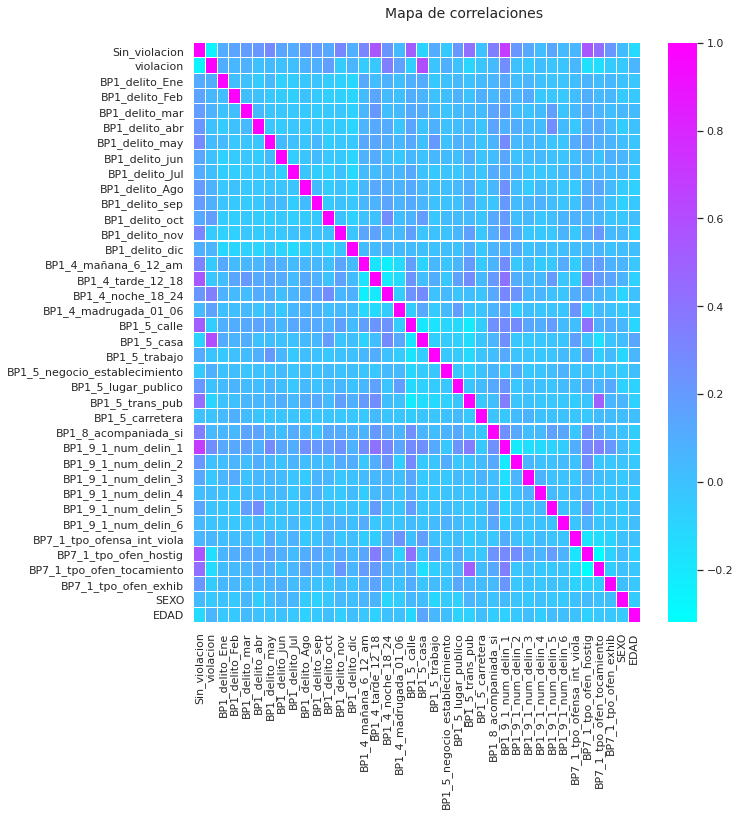

In [102]:
import plotly.express as px

corr1=VicTot_f_cols_disimilaridades.corr()

f, ax=plt.subplots(figsize=(10,10)) #Crea el espacio en blanco para graficar
hm = sns.heatmap(round(corr1,2), ax=ax, cmap="cool",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Mapa de correlaciones', fontsize=14)
    
f.show()

No se observan correlaciones entre las variables de interés


## PCA sobre los datos estandarizados ##




In [113]:
#Análisis de PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
pca = PCA(n_components=2)

# Ajustamos en datos de entrenamiento
scaler.fit(X_std)
train_data = scaler.transform(X_std)

# Obtenemos las representaciones
x_pca = pca.fit_transform(X_std)

print('varianza explicada:',pca.explained_variance_ratio_)

Std=np.round(np.sqrt(pca.explained_variance_),3)
Prop_Var=np.round(pca.explained_variance_ratio_,3)
Loadings=np.round(pca.components_.T,4)
Loadings_df=pd.DataFrame(Loadings)
Loadings_df.columns=['Loading1','Loading2']


#Loadings_df.to_csv('/content/gdrive/My Drive/DataJam2020/Loadings_PCA.csv')
loadings_sort = Loadings_df.sort_values('Loading1')



varianza explicada: [0.10395578 0.06208897]


### Clasificación por PCA en función de los grupos de edad de las victimas



In [112]:

from sklearn.manifold import TSNE

np.random.seed(0)

tsne = TSNE()
X_tsne = tsne.fit_transform(train_data)

tsne_dataset = pd.DataFrame({'PCA1': X_tsne[:, 0], 'PCA2': X_tsne[:, 1], 'Rangos_edad':VicTot_f['Rangos_edad']})

fig = px.scatter(tsne_dataset, x='PCA1', y='PCA2', color= 'Rangos_edad', hover_data=['Rangos_edad'])
fig.update_layout(
    autosize=False,
    width=650,
    height =650,
)
fig.show()


### Clasificación por PCA en función de los estados de la Republica Mexicana en donde vive la victima


In [106]:
import plotly.express as px
import seaborn as sns



np.random.seed(0)
tsne = TSNE()
X_tsne = tsne.fit_transform(train_data)

tsne_dataset = pd.DataFrame({'PCA1': X_tsne[:, 0], 'PCA2': X_tsne[:, 1], 'NOM_ENT':VicTot_f['NOM_ENT']})

fig = px.scatter(tsne_dataset, x='PCA1', y='PCA2', color= 'NOM_ENT', hover_data=['NOM_ENT'],color_discrete_sequence = px.colors.cyclical.Phase)
fig.update_layout(
    autosize=False,
    width=650,
    height =650,
)
fig.show()


### Clasificación por PCA en función del sexo de la victima


In [107]:

np.random.seed(0)
tsne = TSNE()
X_tsne = tsne.fit_transform(train_data)

tsne_dataset = pd.DataFrame({'PCA1': X_tsne[:, 0], 'PCA2': X_tsne[:, 1], 'SEXO':VicTot_f['SEXO']})

fig = px.scatter(tsne_dataset, x='PCA1', y='PCA2', color= 'SEXO', hover_data=['SEXO'])
fig.update_layout(
    autosize=False,
    width=650,
    height =650,
)
fig.show()
